## pyHail MESH Animation

This code utilizes the pyHAIL package to plot MESH, or the "maximum expected size of hail", grid the plots, and then create an animation with the plots.

In [17]:
from __future__ import print_function
import warnings
import warnings
warnings.filterwarnings('ignore')

"""
MESH sub-module of pyhail
Contains the single pol MESH retrieval for gridded radar data.
Required reflectivity and temperature data.
Joshua Soderholm - 15 June 2018
"""
import os

import netCDF4
import numpy as np
import pyart
import pyhail as ph
from pyhail import common
from pyhail import mesh


from pylab import *
import pyart, boto3, tempfile, os, shutil, datetime, matplotlib
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pyart
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from time import time
from datetime import datetime
from dateutil import tz
import os
import cartopy.crs as ccrs
import matplotlib.colors as colors
import cartopy.io.shapereader as shpreader
from skewt import SkewT
import glob
from glob import glob
from botocore.handlers import disable_signing
from matplotlib.animation import FuncAnimation

# from cpol_processing import processing as cpol_prc
from pyhail import hsda, hdr, mesh, common

In [2]:
# Obtaining radar scans...
def get_radar_scan(station='KLOT', date=None, key_index=-20):
    
    '''
    Function will pull the latest radar scan from any radar site using 
    Amazon S3.
    ----------
    Station = Four letter NEXRAD identifier
              Example: 'KEPZ'
    Date = default is none for current date, else enter date in format "YYYY/MM/DD"
    Ex: date ='2013/11/17
    Key_index = Number of keys you want pulled from most recent scan.
    Ex: key_index = -15 would pull ht most recent 15 scans
    '''
    
    # Creating a bucket and a client to be able to pull data from AWS and setting it as unsigned
    bucket = 'noaa-nexrad-level2'
    s3 = boto3.resource('s3')
    s3.meta.client.meta.events.register('choose-signer.s3.*', disable_signing)
    
    # Connects the bucket create above with radar data
    aws_radar = s3.Bucket(bucket)
    
    # Setting the date and time to current...
    # This will allow for allow the current date's radar scands to be pulled
    if date == None:
        target_string = datetime.datetime.utcnow().strftime('%Y/%m/%d/'+station)
    else:
        target_string = date+'/'+station
    
    for obj in aws_radar.objects.filter(Prefix= target_string):
        '{0}:{1}'.format(aws_radar.name, obj.key)
    my_list_of_keys = [this_object.key for this_object in aws_radar.objects.filter(Prefix= target_string)]
    keys = my_list_of_keys[key_index:]
    for key in keys:
        if 'MDM' in key:
            keys.remove(key)
    print(keys)
    return aws_radar, keys

In [3]:
aws_radar, keys = get_radar_scan(station='KLOT', date='2019/05/27', key_index=-400) 
out_path_dir = 'home/amedendorp/Desktop/april182013'

['2019/05/27/KLOT/KLOT20190527_000114_V06', '2019/05/27/KLOT/KLOT20190527_000759_V06', '2019/05/27/KLOT/KLOT20190527_001453_V06', '2019/05/27/KLOT/KLOT20190527_002158_V06', '2019/05/27/KLOT/KLOT20190527_002851_V06', '2019/05/27/KLOT/KLOT20190527_003550_V06', '2019/05/27/KLOT/KLOT20190527_004240_V06', '2019/05/27/KLOT/KLOT20190527_004945_V06', '2019/05/27/KLOT/KLOT20190527_005649_V06', '2019/05/27/KLOT/KLOT20190527_010348_V06', '2019/05/27/KLOT/KLOT20190527_011054_V06', '2019/05/27/KLOT/KLOT20190527_011753_V06', '2019/05/27/KLOT/KLOT20190527_012451_V06', '2019/05/27/KLOT/KLOT20190527_013157_V06', '2019/05/27/KLOT/KLOT20190527_013856_V06', '2019/05/27/KLOT/KLOT20190527_014602_V06', '2019/05/27/KLOT/KLOT20190527_015301_V06', '2019/05/27/KLOT/KLOT20190527_020006_V06', '2019/05/27/KLOT/KLOT20190527_020701_V06', '2019/05/27/KLOT/KLOT20190527_021405_V06', '2019/05/27/KLOT/KLOT20190527_022111_V06', '2019/05/27/KLOT/KLOT20190527_022816_V06', '2019/05/27/KLOT/KLOT20190527_023521_V06', '2019/05/2

In [4]:
nk = keys[175:210] #:210
nk

['2019/05/27/KLOT/KLOT20190527_174127_V06',
 '2019/05/27/KLOT/KLOT20190527_174720_V06',
 '2019/05/27/KLOT/KLOT20190527_175311_V06',
 '2019/05/27/KLOT/KLOT20190527_175859_V06',
 '2019/05/27/KLOT/KLOT20190527_180445_V06',
 '2019/05/27/KLOT/KLOT20190527_181038_V06',
 '2019/05/27/KLOT/KLOT20190527_181615_V06',
 '2019/05/27/KLOT/KLOT20190527_182152_V06',
 '2019/05/27/KLOT/KLOT20190527_182731_V06',
 '2019/05/27/KLOT/KLOT20190527_183245_V06',
 '2019/05/27/KLOT/KLOT20190527_183744_V06',
 '2019/05/27/KLOT/KLOT20190527_184250_V06',
 '2019/05/27/KLOT/KLOT20190527_184750_V06',
 '2019/05/27/KLOT/KLOT20190527_185257_V06',
 '2019/05/27/KLOT/KLOT20190527_185802_V06',
 '2019/05/27/KLOT/KLOT20190527_190308_V06',
 '2019/05/27/KLOT/KLOT20190527_190815_V06',
 '2019/05/27/KLOT/KLOT20190527_191315_V06',
 '2019/05/27/KLOT/KLOT20190527_191813_V06',
 '2019/05/27/KLOT/KLOT20190527_192313_V06',
 '2019/05/27/KLOT/KLOT20190527_192813_V06',
 '2019/05/27/KLOT/KLOT20190527_193343_V06',
 '2019/05/27/KLOT/KLOT20190527_1

In [5]:
localfile = tempfile.NamedTemporaryFile()
aws_radar.download_file(keys[0], localfile.name)
radar = pyart.io.read(localfile.name)
radar.fields.keys()

dict_keys(['differential_reflectivity', 'reflectivity', 'velocity', 'differential_phase', 'spectrum_width', 'cross_correlation_ratio'])

In [106]:
# Turning the data into grid data and saving it to a folder...
# If the grids are already created, there is no need to run this code block again.
def get_grid(aws_radar, nk):
    localfile = tempfile.NamedTemporaryFile()
    aws_radar.download_file(nk, localfile.name)
    radar = pyart.io.read(localfile.name)
    # Create rainfall rate field
    # Mask out last 10 gates of each ray, this removes the "ring" around the radar.
    radar.fields['reflectivity']['data'][:, -10:] = np.ma.masked

    gatefilter = pyart.filters.GateFilter(radar)
    gatefilter.exclude_transition()
    gatefilter.exclude_masked('reflectivity')
    grid = pyart.map.grid_from_radars(
            (radar, ), grid_shape=(16, 300, 300),
            grid_limits=((0, 15000), (-123000.0, 123000.0), (-123000.0, 123000.0)),
            fields=['reflectivity'], weighting_function='Barnes2',
            gridding_algo='map_gates_to_grid',
            h_factor=0., nb=0.6, bsp=1., min_radius=500., gatefilters=(gatefilter, ))
    del radar
    return grid

for num,key in enumerate(nk):
    print('saving grid', num)
    grid = get_grid(aws_radar, key)
    name = os.path.join('/home/amedendorp/Desktop/MESH/MESH_grid_' + str(num).zfill(3) + '.nc')
    pyart.io.write_grid(name, grid)
    del grid
# If the code encounters a .tar file or any other unknown file, it will stop running.
# Every grid created before that will be preserved.

saving grid 0
saving grid 1
saving grid 2
saving grid 3
saving grid 4
saving grid 5
saving grid 6
saving grid 7
saving grid 8
saving grid 9
saving grid 10
saving grid 11
saving grid 12
saving grid 13
saving grid 14
saving grid 15
saving grid 16
saving grid 17
saving grid 18
saving grid 19
saving grid 20
saving grid 21
saving grid 22
saving grid 23
saving grid 24
saving grid 25
saving grid 26
saving grid 27
saving grid 28
saving grid 29
saving grid 30
saving grid 31
saving grid 32
saving grid 33
saving grid 34


In [10]:
from glob import glob
files = glob('/home/amedendorp/Desktop/MESH/MESH_grid_*')
files.sort()

In [18]:
reader = shpreader.Reader('/home/amedendorp/Downloads/countyl010g_shp_nt00964/countyl010g.shp')
counties = list(reader.geometries())
COUNTIES = cfeature.ShapelyFeature(counties, ccrs.PlateCarree())

2019-05-27 17:41:27.973000
2019-05-27 17:41:27.973000
2019-05-27 17:47:20.429000
2019-05-27 17:53:11.744000
2019-05-27 17:58:59.269000
2019-05-27 18:04:45.995000
2019-05-27 18:10:38.871000
2019-05-27 18:16:15.015000
2019-05-27 18:21:52.203000
2019-05-27 18:27:31.288000
2019-05-27 18:32:45.044000
2019-05-27 18:37:44.662000
2019-05-27 18:42:50.639000
2019-05-27 18:47:50.278000
2019-05-27 18:52:57.119000
2019-05-27 18:58:02.637000
2019-05-27 19:03:08.745000
2019-05-27 19:08:15.174000
2019-05-27 19:13:15.230000
2019-05-27 19:18:13.709000
2019-05-27 19:23:13.753000
2019-05-27 19:28:13.415000
2019-05-27 19:33:43.537000
2019-05-27 19:38:42.985000
2019-05-27 19:43:42.072000
2019-05-27 19:49:11.617000
2019-05-27 19:54:57.365000
2019-05-27 20:00:43.523000
2019-05-27 20:06:28.910000
2019-05-27 20:12:15.303000
2019-05-27 20:18:02.746000
2019-05-27 20:23:50.087000
2019-05-27 20:29:37.443000
2019-05-27 20:35:23.932000
2019-05-27 20:41:09.403000


<function matplotlib.pyplot.close(fig=None)>

2019-05-27 17:41:27.973000


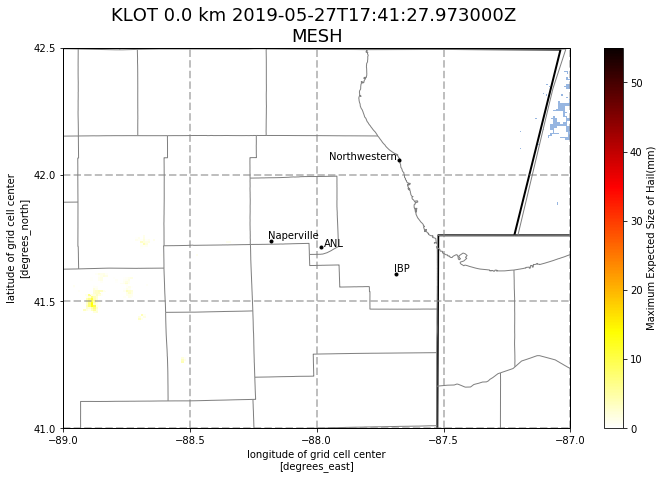

In [21]:
# This code was created using a modified version of pyART. The only thing that will change versus default
# pyART is the thickness and color of the lat and lon lines, and the county and state outlines.
def rr_animation(nframe): 
    plt.clf()
    nfile = files[nframe]
    radar = pyart.io.read_grid(nfile)

    # Converting the default UTC time to local time...
    # Converts to 24-hour time. No AM or PM.
    utc = netCDF4.num2date(radar.time['data'][0],
                       radar.time['units'])
    print(str(utc))
    z = datetime.strptime(str(utc), '%Y-%m-%d %H:%M:%S.%f')
  
    from_zone = tz.tzutc()
    to_zone = tz.tzlocal()
    z = z.replace(tzinfo=from_zone)
    central = z.astimezone(to_zone)
    t = datetime.strftime(central, '%Y-%m-%dT%H:%M:%S.%f')

    title = ('KLOT ' + str(radar.z['data'][0]/1000) + ' km ' + t + ' \n'
             + ' Maximum Expected Size of Hail')
    hail = mesh.main(grid=radar, ref_name='reflectivity', 
                     snd_input='/home/amedendorp/Desktop/Sounding.nc', 
                     sonde_temp='temp', sonde_height='height', 
                     out_ffn=nfile)

    projection = ccrs.PlateCarree()
    
    ax = plt.axes(projection=projection)
    
    # Plot site locations...
    ANL_lon, ANL_lat = -87.981810, 41.713969 
    NW_lon, NW_lat = -87.675885, 42.057888
    Naperville_lon, Naperville_lat = -88.181798, 41.738107
    IBP_lon, IBP_lat = -87.687151, 41.606367

    plt.plot([ANL_lon], [ANL_lat], color='black', marker= '.')
    plt.plot([NW_lon], [NW_lat], color='black', marker= '.')
    plt.plot([Naperville_lon], [Naperville_lat], color='black', marker= '.')
    plt.plot([IBP_lon], [IBP_lat], color='black', marker= '.')

    # Plot names of sites:
    plt.text(ANL_lon + 0.01, ANL_lat - 0., 'ANL', horizontalalignment='left')
    plt.text(NW_lon - 0.01, NW_lat - 0, 'Northwestern', horizontalalignment='right')
    plt.text(Naperville_lon - 0.01, Naperville_lat + 0.01, 'Naperville', horizontalalignment='left')
    plt.text(IBP_lon - 0.01, IBP_lat + 0.01, 'IBP', horizontalalignment='left')
    
    display = pyart.graph.GridMapDisplay(hail)
    display.plot_grid('MESH', level= 0, lat_lines=np.arange(41, 43, .5),
                       lon_lines=np.arange(-89, -86.5, .5), cmap='hot_r', vmax=55, vmin=0)
    

    plt.rcParams.update({'axes.titlesize': '18'})
    
    del radar, display
    ax.add_feature(COUNTIES, facecolor='none', edgecolor='gray')
    ax.add_feature(cfeature.LAKES, zorder=.5)
    
fig = plt.figure(figsize=[12,7])

# Match the frames to the amount of grids
sat_anim = FuncAnimation(fig, rr_animation, frames=34)
sat_anim.save('/home/amedendorp/Desktop/pyhailanimtest2.gif',
              writer='imagemagick', fps=3)
plt.close